# Capstone_Project_3_Image_Classification

## 1. Import library

In [1]:
import os
import cv2
import imghdr
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras.api._v2.keras as keras
from keras.models import Sequential
from tensorflow.keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras import layers,optimizers,losses,callbacks,applications,models

## 2. Remove Dodgy Images

In [2]:
data_dir = 'data'

In [3]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
    try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
            print('Image not in ext list ()'.format(image_path))
            os.remove(image_path)
    except Exception as e:
        print('Issue with image {}'.format(image_path))

## 3. Load Data

In [5]:
data = keras.utils.image_dataset_from_directory('data')


Found 40000 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

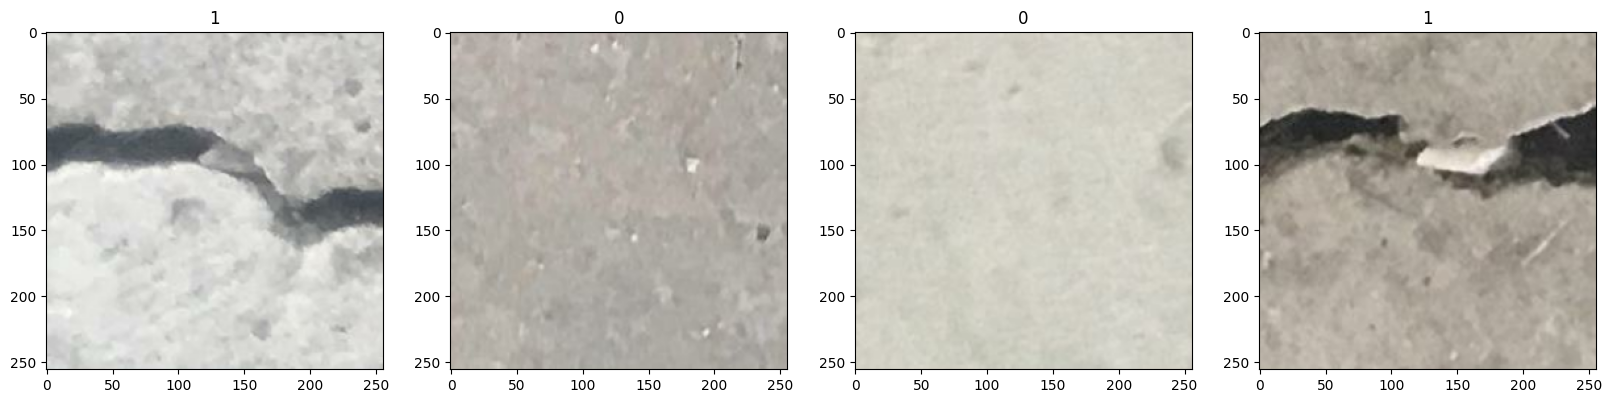

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 4. Scale Data

In [9]:
data = data.map(lambda x,y: (x/255,y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.7490196 , 0.7529412 , 0.73333335],
          [0.7425092 , 0.74643075, 0.7268229 ],
          [0.7355545 , 0.7394761 , 0.71986824],
          ...,
          [0.2649663 , 0.276731  , 0.24705882],
          [0.26925552, 0.28102022, 0.24572611],
          [0.2627451 , 0.27450982, 0.23921569]],
 
         [[0.7457644 , 0.74968594, 0.7300781 ],
          [0.74195606, 0.7458776 , 0.7262698 ],
          [0.7355545 , 0.7394761 , 0.71986824],
          ...,
          [0.27792993, 0.28969464, 0.26002246],
          [0.3040837 , 0.3158484 , 0.2805543 ],
          [0.32459405, 0.33635876, 0.30106464]],
 
         [[0.7394761 , 0.74339765, 0.7237898 ],
          [0.73855424, 0.7424758 , 0.72286797],
          [0.7367733 , 0.7406949 , 0.72108704],
          ...,
          [0.28817105, 0.29993576, 0.27026358],
          [0.33375588, 0.3455206 , 0.31022647],
          [0.37379748, 0.38556218, 0.35026807]],
 
         ...,
 
         [[0.77254903, 0.7607843 , 0.73895526],
          [0.77254

## 5. Split Data

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) #for tuning parameters like number of hidden layers
test_size = int(len(data)*.1) #solely for getting the performance of model

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## 6. Building Deep Learning Model

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
# Plot the model architecture and save it as a .png file
tf.keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [16]:
model.summary() #to see the overall structure of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

## 7. Train

In [17]:
base_log_path = r"tensorboard_logs\image_classification"
log_path = os.path.join(base_log_path,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb = callbacks.TensorBoard(log_path)

In [18]:
early_stopping = callbacks.EarlyStopping(patience=3)

In [19]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tb, early_stopping])

Epoch 1/5
875/875 [==============================] - 138s 152ms/step - loss: 0.1521 - accuracy: 0.9516 - val_loss: 0.0440 - val_accuracy: 0.9868
Epoch 2/5
875/875 [==============================] - 125s 143ms/step - loss: 0.0470 - accuracy: 0.9862 - val_loss: 0.0254 - val_accuracy: 0.9918
Epoch 3/5
875/875 [==============================] - 129s 148ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0227 - val_accuracy: 0.9919
Epoch 4/5
875/875 [==============================] - 127s 145ms/step - loss: 0.0355 - accuracy: 0.9899 - val_loss: 0.0367 - val_accuracy: 0.9946
Epoch 5/5
875/875 [==============================] - 134s 153ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.0215 - val_accuracy: 0.9936


## 8. Plot Performance

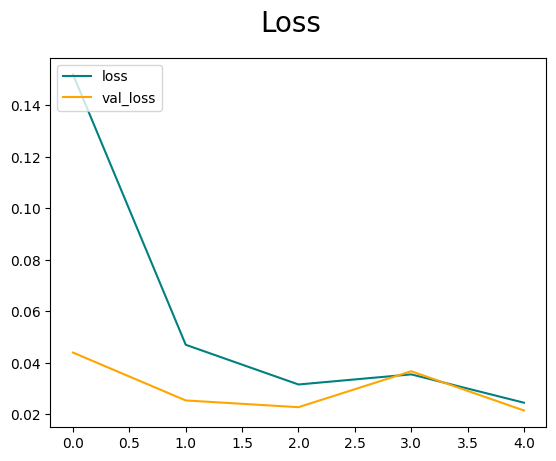

In [20]:
#plotting the loss and val_loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20) 
plt.legend(loc='upper left')
plt.show()

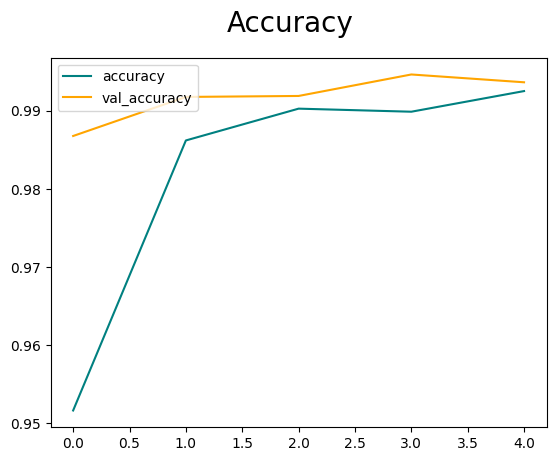

In [21]:
#plot the accuracy and val_accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 9. Evaluate the model

In [22]:
#define the parameters
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [23]:
for batch in test.as_numpy_iterator():
    X,y = batch
    pred = model.predict(X)
    pre.update_state(y, pred)
    re.update_state(y,pred)
    acc.update_state(y,pred)

1/1 [==============================] - 0s 45ms/step


In [24]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.9915254 0.9935065 0.9925


## 10. Testing the model

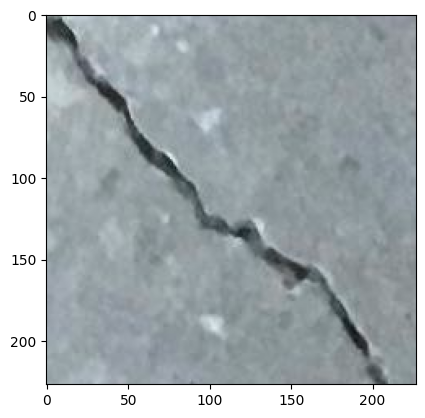

In [25]:
#load the test data
img = cv2.imread('test +ve.jpg') #+ve test data
plt.imshow(img)
plt.show()

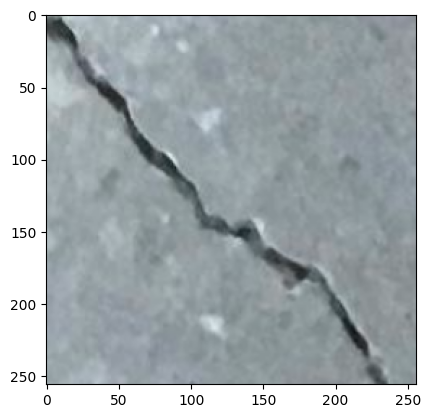

In [26]:
#resizing the test data 
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [27]:
y_pred = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 401ms/step


In [28]:
y_pred

array([[1.]], dtype=float32)

In [29]:
if y_pred > 0.5:
    print(f'Predicted class is Positive')
else:
    print(f'Predicted class is Negative')

Predicted class is Positive


## 11. Save the Model

In [30]:
model.save(os.path.join('models', 'model.h5'))

## 12. Deploy Model to Make Prediction

In [31]:
#load the model
load_model = load_model('./models/model.h5')

In [32]:
#making predictions after resizing
load_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 74ms/step


array([[1.]], dtype=float32)

In [33]:
if y_pred > 0.5:
    print(f'Predicted class is Positive')
else:
    print(f'Predicted class is Negative')

Predicted class is Positive
